In [1]:
# Dependencies and Setup
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import scipy.stats as st
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

# metadata 
heart_disease.metadata
#Information about dataset

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M.

The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 

In [2]:
#Information about variable information
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [3]:
#Original DataFrame
df = heart_disease.data.original
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
#DataFrame summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
#Double check to see what columns have missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [6]:
#Due to number of missing values 6 rows will be removed to preserve accuracy
df = df.dropna()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


In [7]:
#All numerical values
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [8]:
df.num.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [9]:
df.num.value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

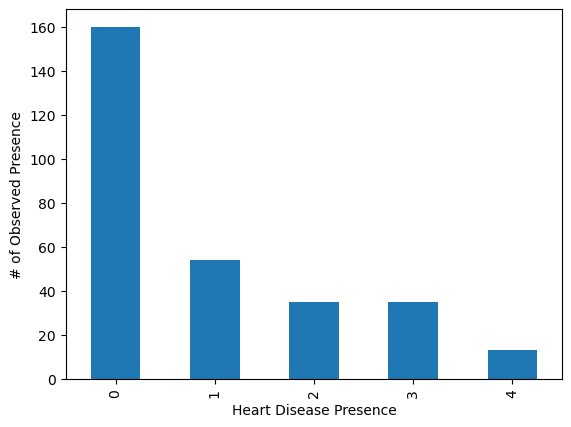

In [10]:
counts = df.num.value_counts()
counts.plot(kind="bar")
plt.xlabel("Heart Disease Presence")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Presence")
plt.show()

In [11]:
#Min and Max age
df['age'].agg(['min', 'max'])

min    29
max    77
Name: age, dtype: int64

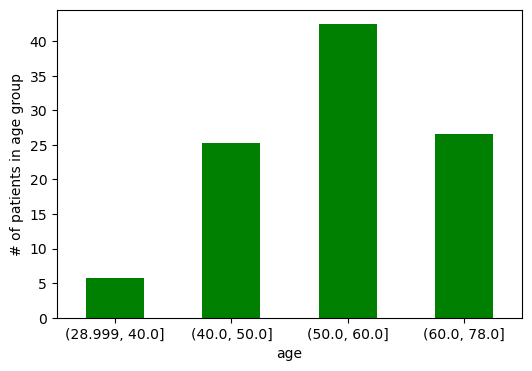

In [12]:
out = pd.cut(df.age, bins=[29,40,50,60,78], include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="g", figsize=(6,4))
plt.ylabel("# of patients in age group")
plt.show()

In [13]:
test = df.sort_values(['age'], ascending=[False])
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
161,77,1,4,125,304,0,2,162,1,0.0,1,3.0,3.0,4
257,76,0,3,140,197,0,1,116,0,1.1,2,0.0,3.0,0
233,74,0,2,120,269,0,2,121,1,0.2,1,1.0,3.0,0
42,71,0,2,160,302,0,0,162,0,0.4,1,2.0,3.0,0
103,71,0,3,110,265,1,2,130,0,0.0,1,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,35,0,4,138,183,0,0,182,0,1.4,1,0.0,3.0,0
138,35,1,4,120,198,0,0,130,1,1.6,2,0.0,7.0,1
101,34,1,1,118,182,0,2,174,0,0.0,1,0.0,3.0,0
225,34,0,2,118,210,0,0,192,0,0.7,1,0.0,3.0,0


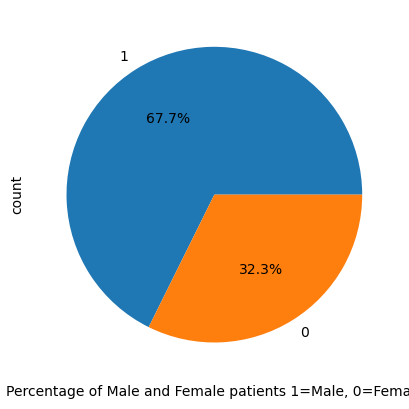

In [14]:
# Male and Female patients 1=Male 0=Female
counts = df.sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.xlabel("Percentage of Male and Female patients 1=Male, 0=Female")
plt.show()

In [15]:
#Features and target values for model
X = df.drop(columns='num')
y = df['num']

In [16]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [17]:
y.dtypes

dtype('int64')

In [18]:
len(X)

297

In [19]:
len(y)

297

In [20]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
# Import the LogisticRegression module 
from sklearn.linear_model import LogisticRegression
#Define LogisticRegression module 
lr_model = LogisticRegression(random_state=1)

# Fit the model with training data
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [22]:
# Prediction using the testing data
y_pred = lr_model.predict(X_test)
y_pred

array([0, 3, 1, 0, 3, 0, 0, 1, 0, 3, 0, 3, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
y_test

139    0
236    2
51     0
295    0
245    2
      ..
215    0
42     0
80     0
124    1
5      0
Name: num, Length: 75, dtype: int64

In [24]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[38,  3,  0,  0,  0],
       [ 8,  2,  0,  1,  0],
       [ 1,  9,  0,  3,  0],
       [ 2,  3,  0,  4,  0],
       [ 0,  1,  0,  0,  0]], dtype=int64)

In [25]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.84        41
           1       0.11      0.18      0.14        11
           2       0.00      0.00      0.00        13
           3       0.50      0.44      0.47         9
           4       0.00      0.00      0.00         1

    accuracy                           0.59        75
   macro avg       0.28      0.31      0.29        75
weighted avg       0.50      0.59      0.54        75



In [26]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Define Keras Sequential Model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  90
hidden_nodes_layer2 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Summary of the model
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 90)             │         1,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         3,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,941 (19.30 KB)

 Trainable params: 4,941 (19.30 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile the model
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5243 - loss: 0.0000e+00  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5418 - loss: 0.0000e+00 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5231 - loss: 0.0000e+00 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.6409 - loss: 0.0000e+00
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5976 - loss: 0.0000e+00 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.6042 - loss: 0.0000e+00
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.6160 - loss: 0.0000e+00
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.5196 - loss: 0.0000e+00
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.5934 - loss: 0.0000e+00
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.6100 - loss: 0.0000e+00
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.6113 - loss: 0.0000e+00
Epoch 12/100
7/7 ━━━━━

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - 39ms/step - accuracy: 0.5600 - loss: 0.0000e+00
Loss: 0.0, Accuracy: 0.5600000023841858


In [31]:
nn.save("HeartDiseaseSequentialV1.h5")

Continue optimizing model to improve performace. Dataset only includes 300 patients which is not enough for any meaningful results. 